In [1103]:
# import required libraries

import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")

In [1104]:
data_set= pd.read_csv('H2HBABBA2483.csv')

## Data Preprocessing

In [1105]:
# divide the dataset into two parts one where 'clear_date is not null and another where clear date is null'

data_set_main= data_set[data_set['clear_date'].notnull()]
data_set_test = data_set[data_set['clear_date'].isnull()]

main_data = data_set[data_set['clear_date'].isnull()]

In [1106]:
data_set_main

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200416837,DEC corporation,2019-03-04 00:00:00,2019.0,1.928830e+09,2019-02-20,20190220,20190220,20190311.0,USD,RV,1.0,NaN,752.76,20190216.0,NAM4,1.928830e+09,0
1,U001,0200704858,WAKE trust,2019-09-16 00:00:00,2019.0,1.929816e+09,2019-08-31,20190830,20190831,20190915.0,USD,RV,1.0,NaN,17854.08,20190831.0,NAA8,1.929816e+09,0
2,CA02,0140105847,GORDON F corp,2019-08-05 00:00:00,2019.0,2.960566e+09,2019-07-18,20190718,20190718,20190803.0,CAD,RV,1.0,NaN,917.35,20190724.0,CA10,2.960566e+09,0
3,U001,0200769623,WAL-MAR llc,2019-04-22 00:00:00,2019.0,1.929119e+09,2019-04-10,20190410,20190410,20190425.0,USD,RV,1.0,NaN,813.17,20190410.0,NAH4,1.929119e+09,0
4,CA02,0100034823,ZARCO trust,2019-07-30 00:00:00,2019.0,2.960557e+09,2019-07-12,20190712,20190712,20190725.0,CAD,RV,1.0,NaN,14854.70,20190715.0,CA10,2.960557e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,0200769623,WAL-MAR co,2019-12-09 00:00:00,2019.0,1.930191e+09,2019-11-26,20191126,20191126,20191211.0,USD,RV,1.0,NaN,21003.08,20191126.0,NAH4,1.930191e+09,0
49994,U001,0200769623,WAL-MAR foundation,2019-03-19 00:00:00,2019.0,1.928889e+09,2019-03-03,20190302,20190303,20190318.0,USD,RV,1.0,NaN,887.50,20190303.0,NAH4,1.928889e+09,0
49996,U001,0200806580,BE foundation,2019-06-24 00:00:00,2019.0,1.929485e+09,2019-06-18,20190612,20190618,20190703.0,USD,RV,1.0,NaN,23426.15,20190618.0,NAA8,1.929485e+09,0
49997,U001,0200881076,ALBERT us,2019-04-23 00:00:00,2019.0,1.929109e+09,2019-04-08,20190408,20190408,20190423.0,USD,RV,1.0,NaN,65906.57,20190408.0,NAA8,1.929109e+09,0


In [1107]:
data_set_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  float64
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  float64
 10  invoice_currency        40000 non-null  object 
 11  document type           40000 non-null  object 
 12  posting_id              40000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       40000 non-null

In [1108]:
# since area_bussiness is constant feature hence we will drop this column

data_set_main = data_set_main.drop('area_business', axis=1)
data_set_test = data_set_test.drop('area_business', axis=1)

In [1109]:
# to check how many unique values are present in a particular column

data_set_main.nunique()

business_code                 6
cust_number                1337
name_customer              3861
clear_date                  400
buisness_year                 2
doc_id                    39145
posting_date                422
document_create_date        427
document_create_date.1      423
due_in_date                 492
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         35659
baseline_create_date        431
cust_payment_terms           69
invoice_id                39140
isOpen                        1
dtype: int64

In [1110]:
# This line of code returns the number of missing values in each column

data_set_main.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                5
isOpen                    0
dtype: int64

In [1111]:
# we are droping constant features
data_set_main = data_set_main.drop('posting_id', axis=1)
data_set_test = data_set_test.drop('posting_id', axis=1)
data_set_main = data_set_main.drop('isOpen', axis=1)
data_set_test = data_set_test.drop('isOpen', axis=1)
data_set_main = data_set_main.drop('invoice_id', axis=1)
data_set_test = data_set_test.drop('invoice_id', axis=1)

In [1112]:
# remove duplicates from the dataset
data_set_main = data_set_main.loc[:,~data_set_main.columns.duplicated()]
data_set_test = data_set_test.loc[:,~data_set_main.columns.duplicated()]

In [1113]:
# changing object datatype to string datatype

data_set_main['clear_date']=pd.to_datetime(data_set_main['clear_date'].astype(str))
data_set_main['due_in_date'] = pd.to_datetime(data_set_main['due_in_date'], format='%Y%m%d') 
data_set_main['posting_date']=pd.to_datetime(data_set_main['posting_date'].astype(str))
data_set_main['document_create_date'] = pd.to_datetime(data_set_main['document_create_date'], format='%Y%m%d') 
data_set_main['document_create_date.1'] = pd.to_datetime(data_set_main['document_create_date.1'], format='%Y%m%d') 
data_set_main['baseline_create_date'] = pd.to_datetime(data_set_main['baseline_create_date'], format='%Y%m%d')


data_set_test['posting_date']=pd.to_datetime(data_set_test['posting_date'].astype(str))
data_set_test['document_create_date'] = pd.to_datetime(data_set_test['document_create_date'], format='%Y%m%d') 
data_set_test['document_create_date.1'] = pd.to_datetime(data_set_test['document_create_date.1'], format='%Y%m%d') 
data_set_test['baseline_create_date'] = pd.to_datetime(data_set_test['baseline_create_date'], format='%Y%m%d')
data_set_test['due_in_date'] = pd.to_datetime(data_set_test['due_in_date'], format='%Y%m%d') 
data_set_test['clear_date']=pd.to_datetime(data_set_test['clear_date'].astype(str))

In [1114]:
data_set_main=data_set_main.sort_values('posting_date')

data_set_test=data_set_test.sort_values('posting_date')
data_set_main

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
20743,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,78.95,2018-12-30,NAH4
15202,U001,0200726979,BJ'S us,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,249.89,2018-12-30,NAA8
34429,CA02,0140106408,WAL-M systems,2019-01-25,2019.0,2.960520e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-09,CAD,RV,70575.97,2018-12-30,CA10
40,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928521e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,16513.64,2018-12-30,NAH4
30358,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928532e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,16663.36,2018-12-30,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47291,U001,0200794332,COST llc,2020-03-11,2020.0,1.930572e+09,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,RV,44757.24,2020-02-26,NAAX
31045,U001,0200759878,SA corporation,2020-03-13,2020.0,1.930560e+09,2020-02-26,2020-02-23,2020-02-26,2020-03-12,USD,RV,14422.83,2020-02-26,NAH4
41386,U001,0100031704,DELHAIZE,2020-03-17,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,104677.14,2020-02-27,NAA8
2227,U001,0200759878,SA in,2020-03-13,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,75231.52,2020-02-27,NAH4


In [1115]:
# Converting USD and CAD and 1 CAD = 0.81 USD

x = data_set[data_set['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    data_set['total_open_amount'][i] = 0.81*x[i]


data = data_set.drop(columns=['invoice_currency'])

x = data_set_main[data_set_main['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    data_set_main['total_open_amount'][i] = 0.81*x[i]


In [1116]:
# Converting USD and CAD and 1 CAD = 0.81 USD

x = data_set[data_set['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    data_set['total_open_amount'][i] = 0.81*x[i]


data1 = data_set.drop(columns=['invoice_currency'])

x = data_set_test[data_set_test['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    data_set_test['total_open_amount'][i] = 0.81*x[i]


In [1117]:
data_set_main["cust_number"]

20743    0200769623
15202    0200726979
34429    0140106408
40       0200769623
30358    0200769623
            ...    
47291    0200794332
31045    0200759878
41386    0100031704
2227     0200759878
2194     0200794332
Name: cust_number, Length: 40000, dtype: object

In [1118]:
# 'Cust_number' features contains some ambiguity hence I am dropping few column which are irrelevant
data_set_main["cust_number"] = pd.to_numeric(data_set_main['cust_number'],errors='coerce') # invalid parsing will be set as NaN
data_set_main = data_set_main.dropna()

In [1119]:
data_set_main.shape

(38676, 15)

In [1120]:
data_set_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38676 entries, 20743 to 2194
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           38676 non-null  object        
 1   cust_number             38676 non-null  float64       
 2   name_customer           38676 non-null  object        
 3   clear_date              38676 non-null  datetime64[ns]
 4   buisness_year           38676 non-null  float64       
 5   doc_id                  38676 non-null  float64       
 6   posting_date            38676 non-null  datetime64[ns]
 7   document_create_date    38676 non-null  datetime64[ns]
 8   document_create_date.1  38676 non-null  datetime64[ns]
 9   due_in_date             38676 non-null  datetime64[ns]
 10  invoice_currency        38676 non-null  object        
 11  document type           38676 non-null  object        
 12  total_open_amount       38676 non-null  flo

In [1121]:
# Storing the difference of clear_date and due_in_date in another column that is our target feature.

data_set_main['target'] = (data_set_main['clear_date'] - data_set_main['due_in_date']).dt.days
data_set_main = data_set_main.drop('clear_date', axis=1)

In [1122]:
data_set_test['target'] = (data_set_test['clear_date'] - data_set_test['due_in_date']).dt.days
data_set_test = data_set_test.drop('clear_date', axis=1)

In [1123]:
# Breaking 'posting_date' into month, days and weekday

data_set_main['post_month'] = data_set_main['posting_date'].dt.month
data_set_main['post_day'] = data_set_main['posting_date'].dt.day
data_set_main['post_year_weeksdays'] = data_set_main['posting_date'].dt.weekday
data_set_main = data_set_main.drop('posting_date',axis=1)

In [1124]:
data_set_test['post_month'] = data_set_test['posting_date'].dt.month
data_set_test['post_day'] = data_set_test['posting_date'].dt.day
data_set_test['post_year_weeksdays'] = data_set_test['posting_date'].dt.weekday
data_set_test = data_set_test.drop('posting_date',axis=1)

In [1125]:
# Breaking 'document_create_date' into month, days and weekday
data_set_main['document_create_month'] = data_set_main['document_create_date'].dt.month
data_set_main['document_create_day'] = data_set_main['document_create_date'].dt.day
data_set_main['document_create_weeksdays'] = data_set_main['document_create_date'].dt.weekday
data_set_main = data_set_main.drop('document_create_date',axis=1)

In [1126]:
data_set_main.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,target,post_month,post_day,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays
20743,U001,200769623.0,WAL-MAR co,2019.0,1.928538e+09,2018-12-30,2019-01-14,USD,RV,78.950000,2018-12-30,NAH4,-5,12,30,6,12,29,5
15202,U001,200726979.0,BJ'S us,2019.0,1.928540e+09,2018-12-30,2019-01-14,USD,RV,249.890000,2018-12-30,NAA8,1,12,30,6,12,29,5
34429,CA02,140106408.0,WAL-M systems,2019.0,2.960520e+09,2018-12-30,2019-01-09,CAD,RV,46304.893917,2018-12-30,CA10,16,12,30,6,12,30,6
40,U001,200769623.0,WAL-MAR corporation,2019.0,1.928521e+09,2018-12-30,2019-01-14,USD,RV,16513.640000,2018-12-30,NAH4,-5,12,30,6,12,31,0
30358,U001,200769623.0,WAL-MAR in,2019.0,1.928532e+09,2018-12-30,2019-01-14,USD,RV,16663.360000,2018-12-30,NAH4,-4,12,30,6,12,29,5


In [1127]:
data_set_test['document_create_month'] = data_set_test['document_create_date'].dt.month
data_set_test['document_create_day'] = data_set_test['document_create_date'].dt.day
data_set_test['document_create_weeksdays'] = data_set_test['document_create_date'].dt.weekday
data_set_test = data_set_test.drop('document_create_date',axis=1)

In [1128]:
# Breaking 'document_create_date.1' into month, days and weekday
data_set_main['document_create1_month'] = data_set_main['document_create_date.1'].dt.month
data_set_main['document_create1_day'] = data_set_main['document_create_date.1'].dt.day
data_set_main['document_create1_weeksdays'] = data_set_main['document_create_date.1'].dt.weekday
data_set_main = data_set_main.drop('document_create_date.1',axis=1)

In [1129]:
data_set_test['document_create1_month'] =data_set_test['document_create_date.1'].dt.month
data_set_test['document_create1_day'] = data_set_test['document_create_date.1'].dt.day
data_set_test['document_create1_weeksdays'] = data_set_test['document_create_date.1'].dt.weekday
data_set_test = data_set_test.drop('document_create_date.1',axis=1)

In [1130]:

data_set_main = data_set_main.drop('due_in_date',axis=1)

In [1131]:
data_set_test = data_set_test.drop('due_in_date',axis=1)

In [1132]:
# Breaking 'baseline_create_date' into month, days and weekday
data_set_main['baseline_create_date_month'] = data_set_main['baseline_create_date'].dt.month
data_set_main['baseline_create_date_day'] = data_set_main['baseline_create_date'].dt.day
data_set_main['baseline_create_date_year'] = data_set_main['baseline_create_date'].dt.year
data_set_main = data_set_main.drop('baseline_create_date',axis=1)

In [1133]:
# Breaking 'baseline_create_date' into month, days and weekday
data_set_test['baseline_create_date_month'] = data_set_test['baseline_create_date'].dt.month
data_set_test['baseline_create_date_day'] = data_set_test['baseline_create_date'].dt.day
data_set_test['baseline_create_date_year'] = data_set_test['baseline_create_date'].dt.year
data_set_test = data_set_test.drop('baseline_create_date',axis=1)

## Split Data into Training, Testing and Validation set.

In [1134]:
# Seperating target data from dataframe and storing them into another dataframe

X = data_set_main.drop(['target'], axis=1) 
y = data_set_main['target']

In [1135]:
# Spliting X, y again.

from sklearn.model_selection import train_test_split
X_train, X_test_train, y_train, y_test_train = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)
X_train.shape, X_test_train.shape

((30940, 21), (7736, 21))

In [1136]:
# Again Spliting 

X_val, X_test, y_val, y_test = train_test_split(X_test_train, y_test_train, test_size = 0.3, random_state = 0, shuffle=False)
X_val.shape, X_test.shape

((5415, 21), (2321, 21))

## Feature Engineering

## ---> Started with Label Encoding of Categorical Features.

In [1137]:
# importing Label Encoding libraries from sklearn 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [1138]:
# Label encoding of 'bussiness_code' feature

X_train['business_code']= label_encoder.fit_transform(X_train['business_code'])
X_test['business_code']= label_encoder.fit_transform(X_test['business_code'])
X_val['business_code']= label_encoder.fit_transform(X_val['business_code'])
data_set_test['business_code']= label_encoder.fit_transform(data_set_test['business_code'])
X_train['business_code'].unique()

array([1, 0, 5, 2, 3, 4])

In [1139]:
# Label encoding of 'name_customer' feature

X_train['name_customer']= label_encoder.fit_transform(X_train['name_customer'])
X_test['name_customer']= label_encoder.fit_transform(X_test['name_customer'])
X_val['name_customer']= label_encoder.fit_transform(X_val['name_customer'])
data_set_test['name_customer']= label_encoder.fit_transform(data_set_test['name_customer'])
X_train['name_customer'].unique()

array([3323,  366, 3318, ..., 2789, 1626, 2112])

In [1140]:
# Label encoding of 'cust_payment_terms' feature

X_train['cust_payment_terms']= label_encoder.fit_transform(X_train['cust_payment_terms'])
X_test['cust_payment_terms']= label_encoder.fit_transform(X_test['cust_payment_terms'])
X_val['cust_payment_terms']= label_encoder.fit_transform(X_val['cust_payment_terms'])
data_set_test['cust_payment_terms']= label_encoder.fit_transform(data_set_test['cust_payment_terms'])
X_train['cust_payment_terms'].unique()

array([31, 18,  5, 53, 27, 52, 23, 25, 20, 17, 11, 29, 19, 42, 60, 56, 35,
        6, 55, 32,  4,  8, 33, 14, 58, 13,  3, 47, 21, 22, 24, 15,  2, 12,
       54,  9, 30, 44, 48, 62,  7, 46, 28, 45, 16, 50, 26, 36, 51, 57, 37,
       10, 59, 38, 43, 34, 39,  0,  1, 40, 61, 49, 41])

In [1141]:
# Label encoding of 'document type' feature

X_train['document type']= label_encoder.fit_transform(X_train['document type'])
X_test['document type']= label_encoder.fit_transform(X_test['document type'])
X_val['document type']= label_encoder.fit_transform(X_val['document type'])
data_set_test['document type']= label_encoder.fit_transform(data_set_test['document type'])
X_train['document type'].unique()

array([0, 1])

In [1142]:
# Label encoding of 'business_year' feature

X_train['buisness_year']= label_encoder.fit_transform(X_train['buisness_year'])
X_test['buisness_year']= label_encoder.fit_transform(X_test['buisness_year'])
X_val['buisness_year']= label_encoder.fit_transform(X_val['buisness_year'])
data_set_test['buisness_year']= label_encoder.fit_transform(data_set_test['buisness_year'])
X_train['buisness_year'].unique()

array([0])

In [1143]:
# Label encoding of 'invoice_currency' feature

X_train['invoice_currency']= label_encoder.fit_transform(X_train['invoice_currency'])
X_test['invoice_currency']= label_encoder.fit_transform(X_test['invoice_currency'])
X_val['invoice_currency']= label_encoder.fit_transform(X_val['invoice_currency'])
data_set_test['invoice_currency']= label_encoder.fit_transform(data_set_test['invoice_currency'])
X_train['invoice_currency'].unique()

array([1, 0])

In [1144]:
# Label encoding of 'baseline_create_date_year' feature

X_train['baseline_create_date_year']= label_encoder.fit_transform(X_train['baseline_create_date_year'])
X_test['baseline_create_date_year']= label_encoder.fit_transform(X_test['baseline_create_date_year'])
X_val['baseline_create_date_year']= label_encoder.fit_transform(X_val['baseline_create_date_year'])
data_set_test['baseline_create_date_year']= label_encoder.fit_transform(data_set_test['baseline_create_date_year'])
X_train['baseline_create_date_year'].unique()

array([0, 1])

In [1145]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
20743,1,200769623.0,3323,0,1.928538e+09,1,0,78.950000,31,12,30,6,12,29,5,12,30,6,12,30,0
15202,1,200726979.0,366,0,1.928540e+09,1,0,249.890000,18,12,30,6,12,29,5,12,30,6,12,30,0
34429,0,140106408.0,3318,0,2.960520e+09,0,0,46304.893917,5,12,30,6,12,30,6,12,30,6,12,30,0
40,1,200769623.0,3325,0,1.928521e+09,1,0,16513.640000,31,12,30,6,12,31,0,12,30,6,12,30,0
30358,1,200769623.0,3327,0,1.928532e+09,1,0,16663.360000,31,12,30,6,12,29,5,12,30,6,12,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30705,1,200515231.0,3210,0,1.930178e+09,1,0,35345.910000,18,11,20,2,11,20,2,11,20,2,11,20,1
28362,1,200759878.0,2649,0,1.930173e+09,1,0,80579.180000,60,11,20,2,11,19,1,11,20,2,11,20,1
15573,1,200769623.0,3323,0,1.930170e+09,1,0,63414.590000,31,11,20,2,11,19,1,11,20,2,11,20,1
15466,1,200794332.0,716,0,1.930165e+09,1,0,15914.110000,20,11,20,2,11,18,0,11,20,2,11,20,1


## Second step is standarisation or normalisation of required features.


In [1146]:
# This is how my X_train looks like , Since all features are in either float or int it will be easy to visualise our data.
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
20743,1,200769623.0,3323,0,1.928538e+09,1,0,78.950000,31,12,30,6,12,29,5,12,30,6,12,30,0
15202,1,200726979.0,366,0,1.928540e+09,1,0,249.890000,18,12,30,6,12,29,5,12,30,6,12,30,0
34429,0,140106408.0,3318,0,2.960520e+09,0,0,46304.893917,5,12,30,6,12,30,6,12,30,6,12,30,0
40,1,200769623.0,3325,0,1.928521e+09,1,0,16513.640000,31,12,30,6,12,31,0,12,30,6,12,30,0
30358,1,200769623.0,3327,0,1.928532e+09,1,0,16663.360000,31,12,30,6,12,29,5,12,30,6,12,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30705,1,200515231.0,3210,0,1.930178e+09,1,0,35345.910000,18,11,20,2,11,20,2,11,20,2,11,20,1
28362,1,200759878.0,2649,0,1.930173e+09,1,0,80579.180000,60,11,20,2,11,19,1,11,20,2,11,20,1
15573,1,200769623.0,3323,0,1.930170e+09,1,0,63414.590000,31,11,20,2,11,19,1,11,20,2,11,20,1
15466,1,200794332.0,716,0,1.930165e+09,1,0,15914.110000,20,11,20,2,11,18,0,11,20,2,11,20,1


## EDA

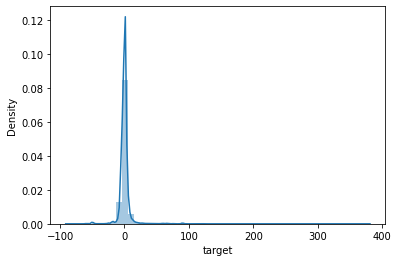

In [1147]:
# Distribution Diagram of our target feature.
# This diagram is not skewed hence I am not using using any transformation function like logarithmic ..etc

import seaborn as sns
sns.distplot(data_set_main['target'])

### Note

In [1148]:
# Was Tryig to remove my outliers but although it is improving my mse error but it is not 
# a good practice therefore I dropped thsi idea.
# Removing Outliers because my dataset is very ambiguous and it is giving high MSE value

#Q1 = data_set_main['target'].quantile(0.25)
#Q3 = data_set_main['target'].quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#data_set_main['target'] = data_set_main['target'][~((data_set_main['target'] < (Q1 - 20* IQR)) |(data_set_main['target'] > (Q3 + 20* IQR)))]

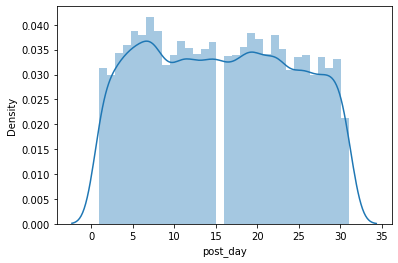

In [1149]:
# Distribution Diagram of our post_day feature.

sns.distplot(X_train['post_day'])

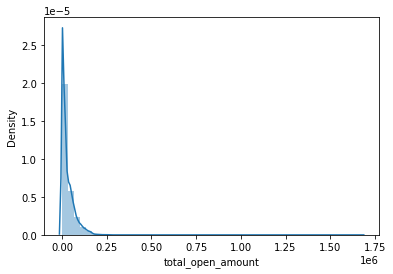

In [1150]:
# Distribution Diagram of our 'total_open_amount' feature.

sns.distplot(X_train['total_open_amount'])

In [1151]:
# As we can see that the distribution is slightly right skewed therefore I have applied log transformation.

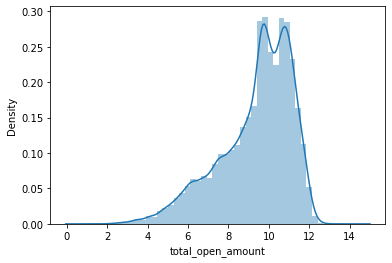

<Figure size 432x288 with 0 Axes>

In [1152]:
from matplotlib import pyplot as plt
X_train['total_open_amount'] = np.log(X_train['total_open_amount'])
X_test['total_open_amount'] = np.log(X_test['total_open_amount'])
X_val['total_open_amount'] = np.log(X_val['total_open_amount'])
sns.distplot(X_train['total_open_amount'])
fig = plt.figure()

In [1153]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
20743,1,200769623.0,3323,0,1.928538e+09,1,0,4.368815,31,12,30,6,12,29,5,12,30,6,12,30,0
15202,1,200726979.0,366,0,1.928540e+09,1,0,5.521021,18,12,30,6,12,29,5,12,30,6,12,30,0
34429,0,140106408.0,3318,0,2.960520e+09,0,0,10.743003,5,12,30,6,12,30,6,12,30,6,12,30,0
40,1,200769623.0,3325,0,1.928521e+09,1,0,9.711942,31,12,30,6,12,31,0,12,30,6,12,30,0
30358,1,200769623.0,3327,0,1.928532e+09,1,0,9.720968,31,12,30,6,12,29,5,12,30,6,12,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30705,1,200515231.0,3210,0,1.930178e+09,1,0,10.472938,18,11,20,2,11,20,2,11,20,2,11,20,1
28362,1,200759878.0,2649,0,1.930173e+09,1,0,11.296996,60,11,20,2,11,19,1,11,20,2,11,20,1
15573,1,200769623.0,3323,0,1.930170e+09,1,0,11.057449,31,11,20,2,11,19,1,11,20,2,11,20,1
15466,1,200794332.0,716,0,1.930165e+09,1,0,9.674961,20,11,20,2,11,18,0,11,20,2,11,20,1


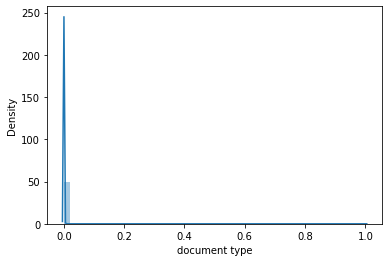

In [1154]:
# Distribution Diagram of our 'document type' feature.

sns.distplot(X_train['document type'])

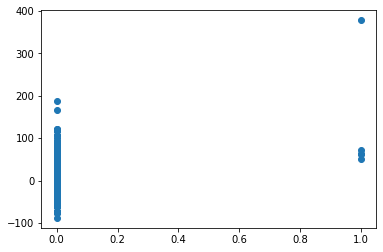

In [1155]:
plt.scatter(X_train['document type'], y_train)
plt.show()

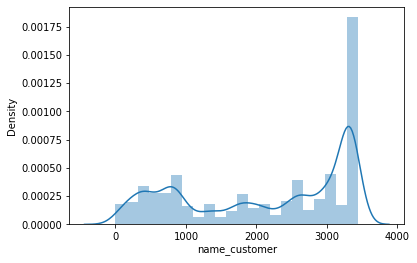

In [1156]:
sns.distplot(X_train['name_customer'])

In [1157]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
20743,1,200769623.0,3323,0,1.928538e+09,1,0,4.368815,31,12,30,6,12,29,5,12,30,6,12,30,0
15202,1,200726979.0,366,0,1.928540e+09,1,0,5.521021,18,12,30,6,12,29,5,12,30,6,12,30,0
34429,0,140106408.0,3318,0,2.960520e+09,0,0,10.743003,5,12,30,6,12,30,6,12,30,6,12,30,0
40,1,200769623.0,3325,0,1.928521e+09,1,0,9.711942,31,12,30,6,12,31,0,12,30,6,12,30,0
30358,1,200769623.0,3327,0,1.928532e+09,1,0,9.720968,31,12,30,6,12,29,5,12,30,6,12,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30705,1,200515231.0,3210,0,1.930178e+09,1,0,10.472938,18,11,20,2,11,20,2,11,20,2,11,20,1
28362,1,200759878.0,2649,0,1.930173e+09,1,0,11.296996,60,11,20,2,11,19,1,11,20,2,11,20,1
15573,1,200769623.0,3323,0,1.930170e+09,1,0,11.057449,31,11,20,2,11,19,1,11,20,2,11,20,1
15466,1,200794332.0,716,0,1.930165e+09,1,0,9.674961,20,11,20,2,11,18,0,11,20,2,11,20,1


In [1158]:
## Feature Selection

In [1159]:
# This piece of code displays the correlation matrix between the features.

X_train.corr()

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_month,document_create_day,document_create_weeksdays,document_create1_month,document_create1_day,document_create1_weeksdays,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year
business_code,1.000000,0.127306,-0.023028,NaN,-0.538994,0.579862,-0.024566,-0.033876,0.520552,0.001826,0.002032,0.021311,0.002508,0.007121,-0.007988,0.001642,0.002648,0.021588,-0.003340,-0.001519,-0.015483
cust_number,0.127306,1.000000,0.122115,NaN,-0.589761,0.607264,-0.028653,-0.043259,0.328520,-0.000664,-0.009044,0.020889,-0.000075,-0.009867,0.029462,-0.000849,-0.008327,0.021249,-0.006658,-0.017893,-0.010614
name_customer,-0.023028,0.122115,1.000000,NaN,-0.018010,0.017031,-0.003525,0.098931,0.155088,-0.008903,-0.002824,0.106071,-0.009157,-0.000426,0.079606,-0.008925,-0.002785,0.106145,-0.009715,0.032110,-0.017949
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,-0.538994,-0.589761,-0.018010,NaN,1.000000,-0.960362,0.318197,0.035718,-0.511590,0.000890,0.014630,-0.006093,0.001038,0.019964,-0.004513,0.003270,0.006649,-0.009673,0.011516,0.016783,-0.000073
invoice_currency,0.579862,0.607264,0.017031,NaN,-0.960362,1.000000,-0.042366,-0.039778,0.538386,-0.002907,-0.009404,0.009797,-0.003070,-0.014755,0.007287,-0.003224,-0.008342,0.010274,-0.011926,-0.018830,-0.012223
document type,-0.024566,-0.028653,-0.003525,NaN,0.318197,-0.042366,1.000000,-0.006949,-0.022863,-0.012111,0.019508,0.009668,-0.012096,0.019696,0.009916,-0.004632,-0.005578,-0.001581,-0.004667,-0.005151,-0.041572
total_open_amount,-0.033876,-0.043259,0.098931,NaN,0.035718,-0.039778,-0.006949,1.000000,-0.128438,0.025298,0.002749,0.001928,0.024334,0.005432,0.012410,0.025081,0.002975,0.002054,0.024878,0.032635,0.007961
cust_payment_terms,0.520552,0.328520,0.155088,NaN,-0.511590,0.538386,-0.022863,-0.128438,1.000000,0.008864,-0.003592,0.085877,0.009094,0.000896,0.057028,0.008693,-0.003019,0.086134,0.004530,-0.036274,-0.013642
post_month,0.001826,-0.000664,-0.008903,NaN,0.000890,-0.002907,-0.012111,0.025298,0.008864,1.000000,-0.053283,-0.005064,0.985341,-0.051243,0.015140,0.999860,-0.052985,-0.004927,0.998653,-0.045417,-0.114440


In [1160]:
# Next step is to remove the highly correlated features.

In [1161]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)
#handling_correlation(X_train.copy(),0.80)

In [1162]:
# storing highly correlated features in a variable. 
corr_features = handling_correlation(X_train.copy(),0.90)
corr_features

['document_create1_day',
 'baseline_create_date_day',
 'baseline_create_date_month',
 'invoice_currency',
 'document_create1_weeksdays',
 'document_create1_month',
 'document_create_month']

In [1163]:
# dropping all high correlated data from X_train,X_val,X_test
X_train = X_train.drop(corr_features, axis=1) 
X_test = X_test.drop(corr_features, axis=1)
X_val = X_val.drop(corr_features, axis=1)
data_set_test = data_set_test.drop(corr_features, axis=1)

In [1164]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,document type,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_day,document_create_weeksdays,baseline_create_date_year
20743,1,200769623.0,3323,0,1.928538e+09,0,4.368815,31,12,30,6,29,5,0
15202,1,200726979.0,366,0,1.928540e+09,0,5.521021,18,12,30,6,29,5,0
34429,0,140106408.0,3318,0,2.960520e+09,0,10.743003,5,12,30,6,30,6,0
40,1,200769623.0,3325,0,1.928521e+09,0,9.711942,31,12,30,6,31,0,0
30358,1,200769623.0,3327,0,1.928532e+09,0,9.720968,31,12,30,6,29,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30705,1,200515231.0,3210,0,1.930178e+09,0,10.472938,18,11,20,2,20,2,1
28362,1,200759878.0,2649,0,1.930173e+09,0,11.296996,60,11,20,2,19,1,1
15573,1,200769623.0,3323,0,1.930170e+09,0,11.057449,31,11,20,2,19,1,1
15466,1,200794332.0,716,0,1.930165e+09,0,9.674961,20,11,20,2,18,0,1


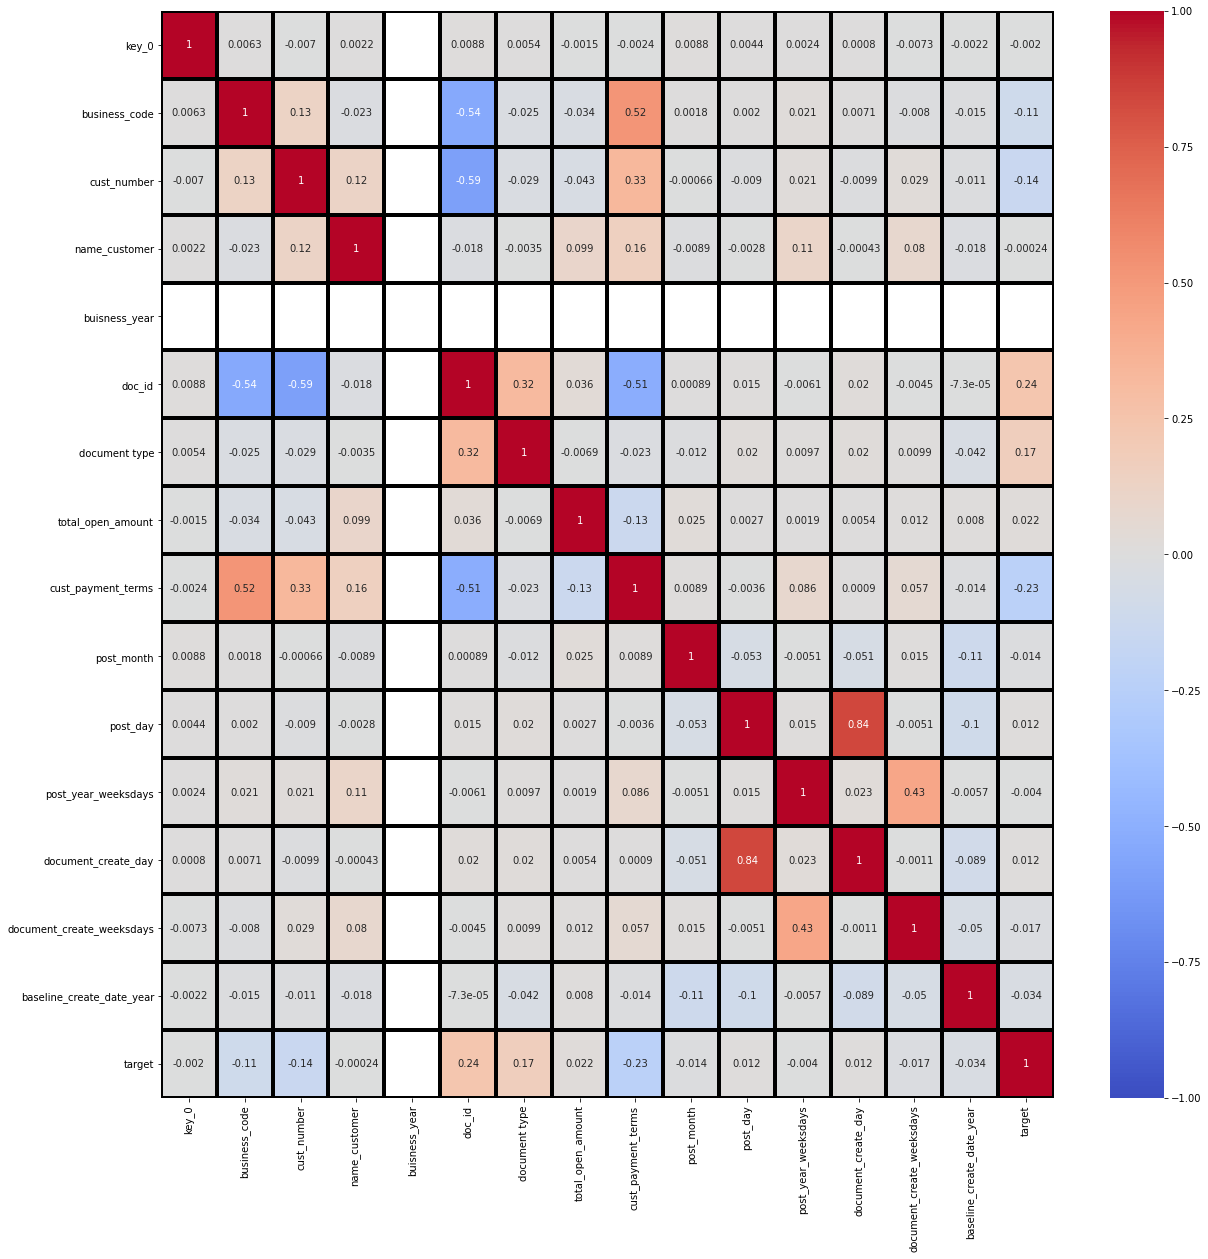

In [1165]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corrmat = X_train.merge(y_train, on = X_train.index).corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,annot=True,cmap= 'coolwarm',vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black')

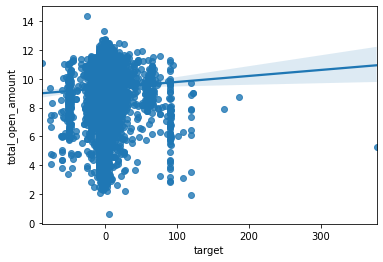

In [1166]:
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='total_open_amount')

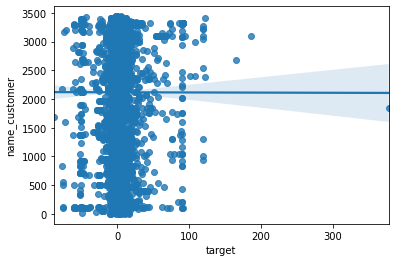

In [1167]:
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='name_customer')

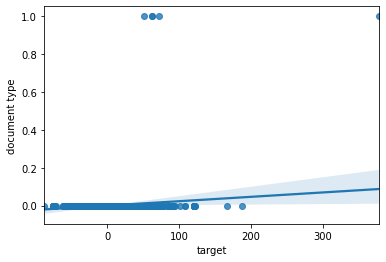

In [1168]:
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='document type')

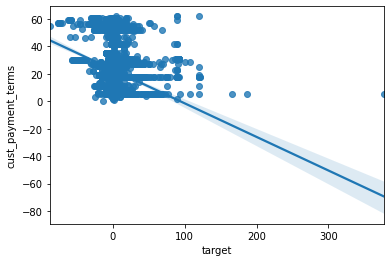

In [1169]:
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='cust_payment_terms')

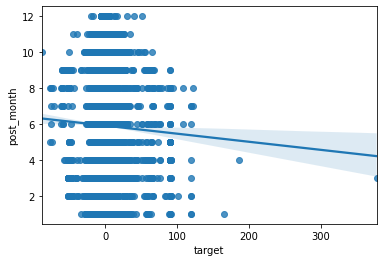

In [1170]:
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='post_month')

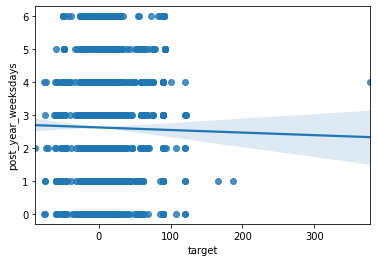

In [1171]:
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='post_year_weeksdays')

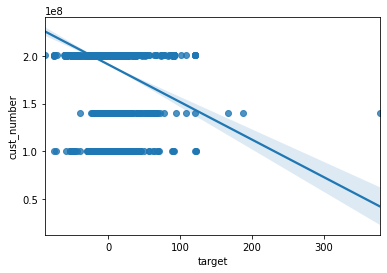

In [1172]:
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='cust_number')

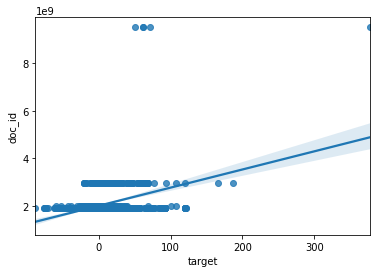

In [1173]:
sns.regplot(data = X_train.merge(y_train, on = X_train.index), x='target', y='doc_id')

In [1174]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'document type', 'total_open_amount', 'cust_payment_terms',
       'post_month', 'post_day', 'post_year_weeksdays', 'document_create_day',
       'document_create_weeksdays', 'baseline_create_date_year'],
      dtype='object')

In [1175]:
X_train = X_train.drop('buisness_year',axis=1)
X_val = X_val.drop('buisness_year',axis=1)
X_test = X_test.drop('buisness_year',axis=1)
data_set_test=data_set_test.drop('buisness_year',axis=1)

X_train = X_train.drop('document type',axis=1)
X_val = X_val.drop('document type',axis=1)
X_test = X_test.drop('document type',axis=1)
data_set_test=data_set_test.drop('document type',axis=1)

In [1176]:
X_train = X_train.drop('doc_id',axis=1)
X_val = X_val.drop('doc_id',axis=1)
X_test = X_test.drop('doc_id',axis=1)
data_set_test=data_set_test.drop('doc_id',axis=1)

In [1177]:
X_train

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_day,document_create_weeksdays,baseline_create_date_year
20743,1,200769623.0,3323,4.368815,31,12,30,6,29,5,0
15202,1,200726979.0,366,5.521021,18,12,30,6,29,5,0
34429,0,140106408.0,3318,10.743003,5,12,30,6,30,6,0
40,1,200769623.0,3325,9.711942,31,12,30,6,31,0,0
30358,1,200769623.0,3327,9.720968,31,12,30,6,29,5,0
...,...,...,...,...,...,...,...,...,...,...,...
30705,1,200515231.0,3210,10.472938,18,11,20,2,20,2,1
28362,1,200759878.0,2649,11.296996,60,11,20,2,19,1,1
15573,1,200769623.0,3323,11.057449,31,11,20,2,19,1,1
15466,1,200794332.0,716,9.674961,20,11,20,2,18,0,1


## Modelling

In [1178]:
from sklearn.metrics import mean_squared_error, r2_score

In [1179]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1180]:
predicted = tree_model.predict(X_val)
pd.DataFrame(zip(y_val, predicted), columns = ['actual', 'predicted'])

,actual,predicted
0,0,166.000000
1,-3,0.340476
2,1,0.340476
3,-3,0.340476
4,0,-1.504762
...,...,...
5410,4,0.340476
5411,1,0.340476
5412,1,0.340476
5413,1,-1.504762


In [1181]:
mean_squared_error(y_val, predicted, squared=False)

30.765363155945877

In [1182]:
r2_score(y_val, predicted)

-14.188600981334021

In [1183]:
tree_model.score(X_test,y_test)

-27.822999034595185

In [1184]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

predicted = regressor.predict(X_val)
pd.DataFrame(zip(y_val, predicted), columns = ['actual', 'predicted'])

,actual,predicted
0,0,260.93
1,-3,2.36
2,1,-3.40
3,-3,2.36
4,0,-3.42
...,...,...
5410,4,0.86
5411,1,1.28
5412,1,1.04
5413,1,2.58


In [1185]:
mean_squared_error(y_val, predicted, squared=False)

54.87097385251647

## Bucketization

In [1186]:
def bucketization(x):
    if x<=0:
        return('(< 0) Days')
    if x>0 and x<=15:
        return('(0-15) Days')
    elif x>15 and x<=30:
        return('(16-30) Days')
    elif x>30 and x<=45:
        return('(31-45) Days')
    elif x>45 and x<=60:
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [1187]:
m = pd.Series([bucketization(x=predicted[i])  for i in range(len(predicted))])

bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1 ,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

m = m.map(bucket_mapper)

m.to_frame()
a1 = m.tail(20)

In [1188]:
xy = y_test

In [1189]:
xy= xy.reset_index(drop=True)
m = pd.Series([bucketization(x=xy[i])  for i in range(len(xy))])

bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

m = m.map(bucket_mapper)

m.to_frame()
a2 = m.tail(20)

In [1190]:
pd.DataFrame(zip(a1, a2), columns = ['actual - Bucket', 'predicted - Bucket'])

,actual - Bucket,predicted - Bucket
0,0,1
1,1,0
2,1,0
3,4,6
4,1,0
5,0,0
6,1,1
7,1,1
8,1,0
9,1,1


## Working on Main Test Dataset

In [1191]:
data_set_test

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,target,post_month,post_day,post_year_weeksdays,document_create_day,document_create_weeksdays,baseline_create_date_year
43034,1,0200743996,1473,86049.420000,14,NaN,2,27,3,26,2,0
28528,1,0200762950,690,45113.380000,14,NaN,2,27,3,27,3,0
6783,1,0200769623,1698,1085.080000,29,NaN,2,27,3,27,3,0
32555,1,0200759878,1323,29965.660000,29,NaN,2,27,3,26,2,0
14577,1,0200705742,464,14465.240000,8,NaN,2,27,3,27,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14979,0,100012991,298,1787.924988,2,NaN,5,14,3,14,3,0
24912,1,0200457993,1369,19798.670000,14,NaN,5,15,4,14,3,0
49752,1,0200915438,655,9144.000000,14,NaN,5,15,4,8,4,0
33905,1,200765011,970,16099.200000,14,NaN,5,18,0,18,0,0


In [1192]:
data_set_test['cust_number'] = pd.to_numeric(data_set_test['cust_number'],errors='coerce') # invalid parsing will be set as NaN
data_set_test=data_set_test.dropna(subset=['cust_number'],axis=0)

In [1193]:
X2 = data_set_test.drop('target',axis=1)
y2= data_set_test['target']
X2.shape

(9869, 11)

In [1194]:
X2

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,post_month,post_day,post_year_weeksdays,document_create_day,document_create_weeksdays,baseline_create_date_year
43034,1,200743996.0,1473,86049.420000,14,2,27,3,26,2,0
28528,1,200762950.0,690,45113.380000,14,2,27,3,27,3,0
6783,1,200769623.0,1698,1085.080000,29,2,27,3,27,3,0
32555,1,200759878.0,1323,29965.660000,29,2,27,3,26,2,0
14577,1,200705742.0,464,14465.240000,8,2,27,3,27,3,0
...,...,...,...,...,...,...,...,...,...,...,...
14979,0,100012991.0,298,1787.924988,2,5,14,3,14,3,0
24912,1,200457993.0,1369,19798.670000,14,5,15,4,14,3,0
49752,1,200915438.0,655,9144.000000,14,5,15,4,8,4,0
33905,1,200765011.0,970,16099.200000,14,5,18,0,18,0,0


In [1195]:
data_set_test.shape

(9869, 12)

In [1196]:

predicted = regressor.predict(X2)
predicted

array([ 0.72,  1.11, -3.72, ...,  4.98,  2.93,  2.62])

In [1197]:
#bucketization
l1= pd.Series([bucketization(x=predicted[i])  for i in range(len(predicted))])

bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

D1 = l1.map(bucket_mapper)

l1

0       (0-15) Days
1       (0-15) Days
2        (< 0) Days
3        (< 0) Days
4       (0-15) Days
           ...     
9864    (> 60) Days
9865    (0-15) Days
9866    (0-15) Days
9867    (0-15) Days
9868    (0-15) Days
Length: 9869, dtype: object

In [1198]:
main_data['cust_number'] = pd.to_numeric(main_data['cust_number'],errors='coerce') # invalid parsing will be set as NaN
main_data=main_data.dropna(subset=['cust_number'],axis=0)

In [1199]:
main_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
7,U001,200468954.0,SKID us,NaN,2020.0,1.930838e+09,2020-04-29,20200429,20200429,20200514.0,USD,RV,1.0,NaN,78312.23,20200429.0,NAA8,1.930838e+09,1
9,U001,200794332.0,COST associates,NaN,2020.0,1.930862e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,49632.81,20200507.0,NAAX,1.930862e+09,1
14,U001,200769623.0,WAL-MAR corp,NaN,2020.0,1.930885e+09,2020-05-11,20200511,20200511,20200526.0,USD,RV,1.0,NaN,32091.30,20200511.0,NAH4,1.930885e+09,1
18,U007,100024767.0,GREEN us,NaN,2020.0,1.930736e+09,2020-04-02,20200402,20200402,20200507.0,USD,RV,1.0,NaN,1490.00,20200402.0,NAG2,1.930736e+09,1
21,U001,200418007.0,AM associates,NaN,2020.0,1.930751e+09,2020-04-06,20200405,20200406,20200421.0,USD,RV,1.0,NaN,55020.47,20200406.0,NAA8,1.930751e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49961,U001,200769623.0,WAL-MAR llc,NaN,2020.0,1.930753e+09,2020-04-08,20200406,20200408,20200423.0,USD,RV,1.0,NaN,45319.46,20200408.0,NAH4,1.930753e+09,1
49966,U001,200769623.0,WAL-MAR foundation,NaN,2020.0,1.930861e+09,2020-05-06,20200505,20200506,20200521.0,USD,RV,1.0,NaN,9531.82,20200506.0,NAH4,1.930861e+09,1
49993,U001,200770567.0,LABAT us,NaN,2020.0,1.930664e+09,2020-03-19,20200317,20200319,20200403.0,USD,RV,1.0,NaN,64970.42,20200319.0,NAA8,1.930664e+09,1
49995,U001,100031704.0,DELHAIZE us,NaN,2020.0,1.930765e+09,2020-04-08,20200408,20200408,20200423.0,USD,RV,1.0,NaN,84738.14,20200408.0,NAA8,1.930765e+09,1


In [1200]:
l1 = l1.to_frame(name='Aging_bucket')

In [1201]:
main_data.reset_index(drop=True, inplace=True) #resetting index because we need to concat the 2 dataframes
l1.reset_index(drop=True, inplace=True)
main_data=pd.concat([main_data, l1], axis=1)

In [1202]:
main_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Aging_bucket
0,U001,200468954.0,SKID us,NaN,2020.0,1.930838e+09,2020-04-29,20200429,20200429,20200514.0,USD,RV,1.0,NaN,78312.23,20200429.0,NAA8,1.930838e+09,1,(0-15) Days
1,U001,200794332.0,COST associates,NaN,2020.0,1.930862e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,49632.81,20200507.0,NAAX,1.930862e+09,1,(0-15) Days
2,U001,200769623.0,WAL-MAR corp,NaN,2020.0,1.930885e+09,2020-05-11,20200511,20200511,20200526.0,USD,RV,1.0,NaN,32091.30,20200511.0,NAH4,1.930885e+09,1,(< 0) Days
3,U007,100024767.0,GREEN us,NaN,2020.0,1.930736e+09,2020-04-02,20200402,20200402,20200507.0,USD,RV,1.0,NaN,1490.00,20200402.0,NAG2,1.930736e+09,1,(< 0) Days
4,U001,200418007.0,AM associates,NaN,2020.0,1.930751e+09,2020-04-06,20200405,20200406,20200421.0,USD,RV,1.0,NaN,55020.47,20200406.0,NAA8,1.930751e+09,1,(0-15) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,U001,200769623.0,WAL-MAR llc,NaN,2020.0,1.930753e+09,2020-04-08,20200406,20200408,20200423.0,USD,RV,1.0,NaN,45319.46,20200408.0,NAH4,1.930753e+09,1,(> 60) Days
9865,U001,200769623.0,WAL-MAR foundation,NaN,2020.0,1.930861e+09,2020-05-06,20200505,20200506,20200521.0,USD,RV,1.0,NaN,9531.82,20200506.0,NAH4,1.930861e+09,1,(0-15) Days
9866,U001,200770567.0,LABAT us,NaN,2020.0,1.930664e+09,2020-03-19,20200317,20200319,20200403.0,USD,RV,1.0,NaN,64970.42,20200319.0,NAA8,1.930664e+09,1,(0-15) Days
9867,U001,100031704.0,DELHAIZE us,NaN,2020.0,1.930765e+09,2020-04-08,20200408,20200408,20200423.0,USD,RV,1.0,NaN,84738.14,20200408.0,NAA8,1.930765e+09,1,(0-15) Days


In [1203]:
#Creating the final test dataframe
df = pd.DataFrame(predicted, columns=['payment_predicted'])
df

,payment_predicted
0,0.72
1,1.11
2,-3.72
3,-14.73
4,6.92
...,...
9864,260.28
9865,5.15
9866,4.98
9867,2.93


In [1204]:
main_data = main_data.reset_index(drop = True)
main_data['Delay_days'] = df['payment_predicted']

In [1205]:
main_data['due_in_date_1'] = pd.to_datetime(main_data['due_in_date'], format='%Y%m%d') 

In [1206]:
temp = main_data['Delay_days'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
main_data['payment_predicted'] = main_data['due_in_date_1'] + temp

In [1207]:
main_data.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Aging_bucket,Delay_days,due_in_date_1,payment_predicted
9864,U001,200769623.0,WAL-MAR llc,NaN,2020.0,1.930753e+09,2020-04-08,20200406,20200408,20200423.0,USD,RV,1.0,NaN,45319.46,20200408.0,NAH4,1.930753e+09,1,(> 60) Days,260.28,2020-04-23,2021-01-09
9865,U001,200769623.0,WAL-MAR foundation,NaN,2020.0,1.930861e+09,2020-05-06,20200505,20200506,20200521.0,USD,RV,1.0,NaN,9531.82,20200506.0,NAH4,1.930861e+09,1,(0-15) Days,5.15,2020-05-21,2020-05-27
9866,U001,200770567.0,LABAT us,NaN,2020.0,1.930664e+09,2020-03-19,20200317,20200319,20200403.0,USD,RV,1.0,NaN,64970.42,20200319.0,NAA8,1.930664e+09,1,(0-15) Days,4.98,2020-04-03,2020-04-08
9867,U001,100031704.0,DELHAIZE us,NaN,2020.0,1.930765e+09,2020-04-08,20200408,20200408,20200423.0,USD,RV,1.0,NaN,84738.14,20200408.0,NAA8,1.930765e+09,1,(0-15) Days,2.93,2020-04-23,2020-04-26
9868,U001,200704858.0,WAKE foundation,NaN,2020.0,1.930659e+09,2020-03-17,20200316,20200317,20200521.0,USD,RV,1.0,NaN,47321.15,20200317.0,NAGD,1.930659e+09,1,(0-15) Days,2.62,2020-05-21,2020-05-24
